In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
def fcnEuclideanDistance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [6]:
class KMeansClustering:
    
    def __init__(self, k = 5, max_iterations = 100):
        self.k = k
        self.max_iterations = max_iterations
        #list of sample indicies for each cluster
        self.clusters = [[] for _ in range(0, self.k)]
        #mean feature vector for each cluster
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_centroids = np.random.choice(self.n_samples, self.k, replace = False)
        self.centroids = [self.X[idx] for idx in random_centroids]
        
        for _ in range(0, self.max_iterations):
            self.clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
                break
            
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        
        return labels.astype(int)
            
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(0, self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        
        return clusters
        
    def _closest_centroid(self, sample, centroid):
        distances = [fcnEuclideanDistance(sample, point) for point in centroid]
        closest_distance = np.argmin(distances)
        
        return closest_distance 
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        
        return centroids
            
    def _is_converged(self, centroid_old, centroid_new):
        distances = [fcnEuclideanDistance(centroid_old[idx], centroid_new[idx]) for idx in range(0, self.k)]
        
        return sum(distances) == 0


In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=5, n_samples=500, n_features=2, random_state=10)

clusters = len(np.unique(y))
k = KMeansClustering(k=clusters, max_iterations=150)
clustered_lables = k.predict(X)

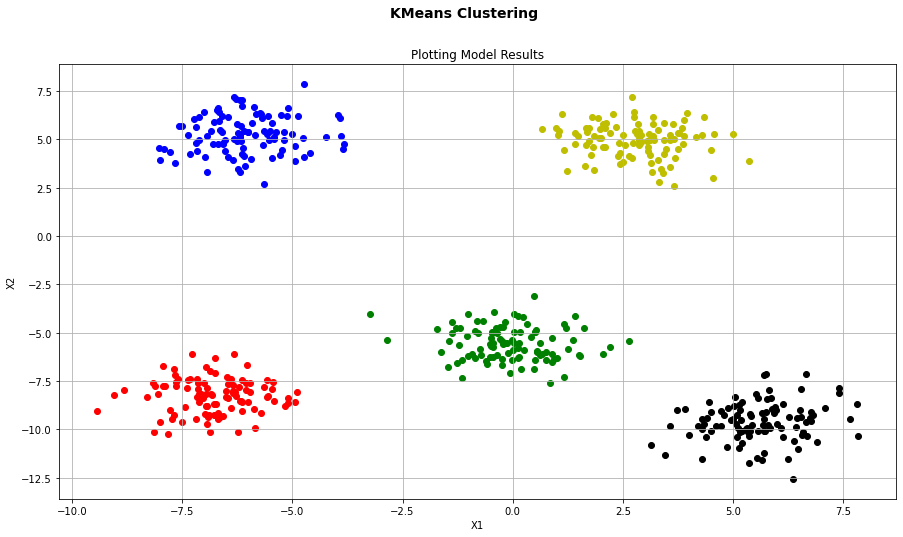

In [9]:
color = ['k', 'b', 'g', 'r', 'y']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("KMeans Clustering", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(clustered_lables)):
    plt.scatter(x = X[idx][0], y = X[idx][1], color = color[clustered_lables[idx]])

plt.show()

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = clusters)
labels = km.fit_predict(X)

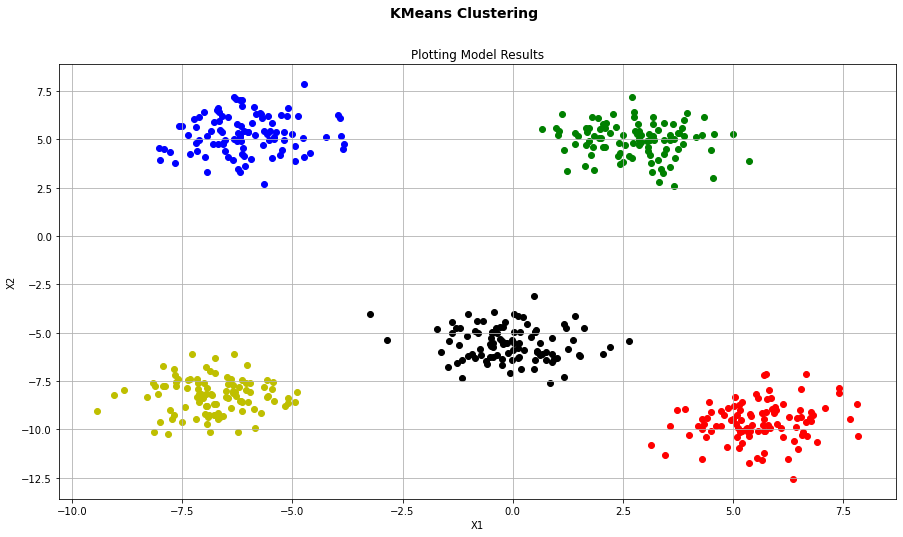

In [12]:
color = ['k', 'b', 'g', 'r', 'y']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("KMeans Clustering", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(clustered_lables)):
    plt.scatter(x = X[idx][0], y = X[idx][1], color = color[labels[idx]])

plt.show()